# 5. k-means

In [1]:
import os
os.environ['OMP_NUM_THREADS']='1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [4]:
x = dataset.iloc[:,:].values # dataset.values or dataset.to_numpy() 다 같음

### 데이터 시각화

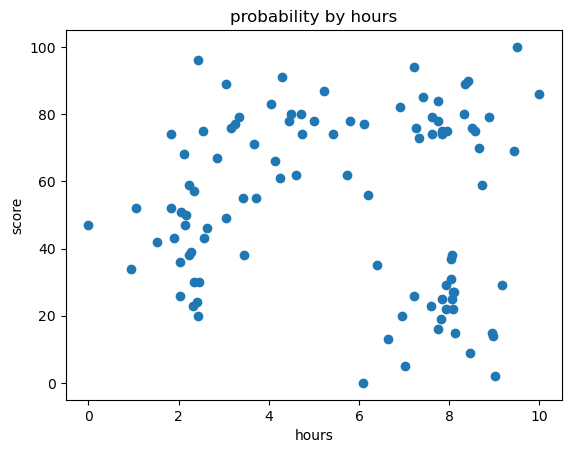

In [5]:
plt.scatter(x[:,0],x[:,1]) # x축:hours y축: score
plt.title('probability by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 ( 축 범위 통일)

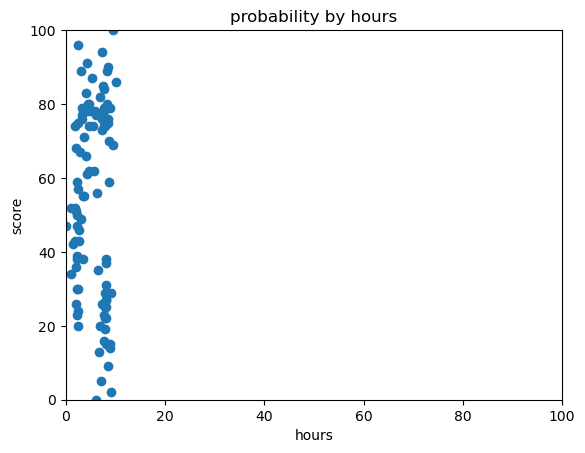

In [6]:
plt.scatter(x[:,0],x[:,1]) # x축:hours y축: score
plt.title('probability by hours')
plt.xlabel('hours')
plt.xlim(0,100)
plt.ylabel('score')
plt.ylim(0,100)
plt.show()

### 피쳐 스케일링

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x[:4]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473]])

### 데이터 시각화 ( 스케일링 데이터)

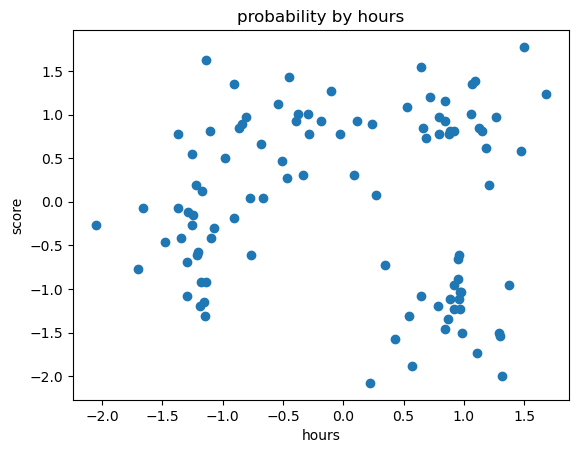

In [8]:
plt.scatter(x[:,0],x[:,1]) # x축:hours y축: score
plt.title('probability by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 최적의 k값 찾기 ( 엘보우 방식)

C:\Users\k\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\k\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\k\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\k\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


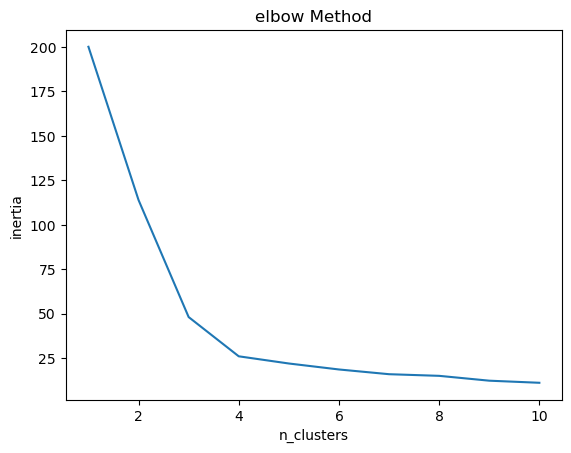

In [11]:
from sklearn.cluster import KMeans
inertia_list =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state = 0)
    kmeans.fit(x)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심 까지의 거리의 제곱의 합

plt.plot(range(1,11),inertia_list)
plt.title('elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 4 값으로 kmeans 학습

In [18]:
k = 4

In [17]:
kmeans = KMeans(n_clusters = k,random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

C:\Users\k\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3])

### 데이터 시각화 ( 최적의 k)

In [21]:
centers = kmeans.cluster_centers_
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

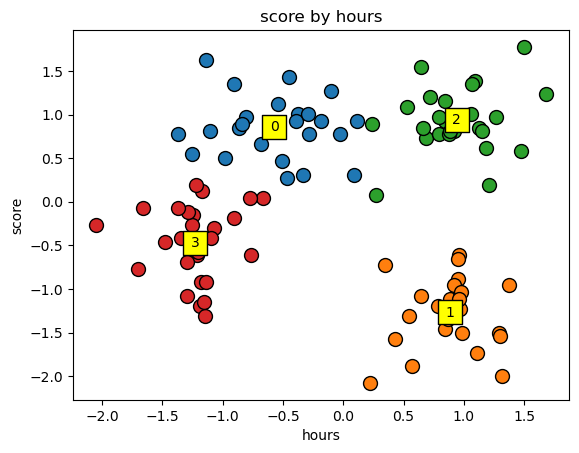

In [27]:
for cluster in range(k):
    plt.scatter(x[y_kmeans == cluster,0],x[y_kmeans == cluster,1],s=100,edgecolor = 'black')
    plt.scatter(centers[cluster,0],centers[cluster,1],s=300,edgecolor = 'black',color='yellow',marker = 's')
    plt.text(centers[cluster,0],centers[cluster,1],cluster,va='center',ha='center') # 클러스터 텍스터 출력
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (스케일링 원복)

In [28]:
x_org = sc.inverse_transform(x) # 스케일링된 데이터를 다시 원복
x_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [30]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

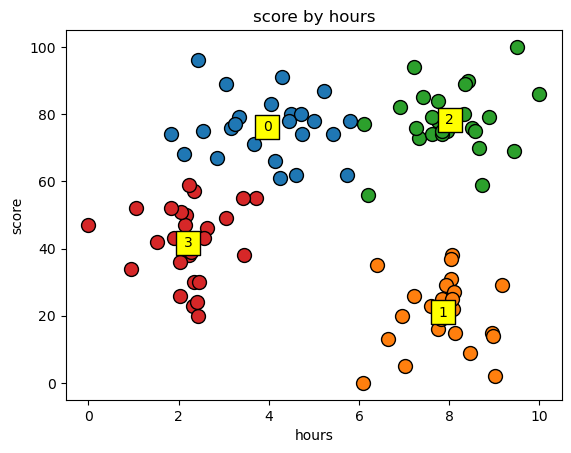

In [31]:
for cluster in range(k):
    plt.scatter(x_org[y_kmeans == cluster,0],x_org[y_kmeans == cluster,1],s=100,edgecolor = 'black')
    plt.scatter(centers_org[cluster,0],centers_org[cluster,1],s=300,edgecolor = 'black',color='yellow',marker = 's')
    plt.text(centers_org[cluster,0],centers_org[cluster,1],cluster,va='center',ha='center') # 클러스터 텍스터 출력
plt.title('score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()